In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [2]:
# Importing the training set
dataset_train = pd.read_csv('train.csv')
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(1726, 1)

In [3]:
training_set

array([[ 1006.210022],
       [ 1007.650024],
       [ 1026.119995],
       ...,
       [62941.80469 ],
       [61460.07813 ],
       [61068.875   ]])

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 80 timesteps and 1 output
X_train = []
y_train = []
for i in range(80, len(training_set)):
    X_train.append(training_set_scaled[i-80:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
# Initialising the RNN
regressor = tf.keras.Sequential()


# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [8]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
52/52 [==============================] - 9s 37ms/step - loss: 0.0138
Epoch 2/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0042
Epoch 3/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0038
Epoch 4/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0029
Epoch 5/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0029
Epoch 6/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0031
Epoch 7/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0026
Epoch 8/200
52/52 [==============================] - 2s 36ms/step - loss: 0.0027
Epoch 9/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0022
Epoch 10/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0026
Epoch 11/200
52/52 [==============================] - 2s 37ms/step - loss: 0.0023
Epoch 12/200
52/52 [==============================] - 2s 38ms/step - loss: 0.0024
Epoch 13/200
52/52 [=====

In [9]:
print("Final Loss : ",history.history['loss'][-1])

Final Loss :  0.0007303872262127697


In [10]:
# Getting the real stock price of 2021
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 80:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [11]:
X_test = []
for i in range(80,180):
    X_test.append(inputs[i-80:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [12]:
predicted_crypto_price = regressor.predict(X_test)
predicted_crypto_price = sc.inverse_transform(predicted_crypto_price)

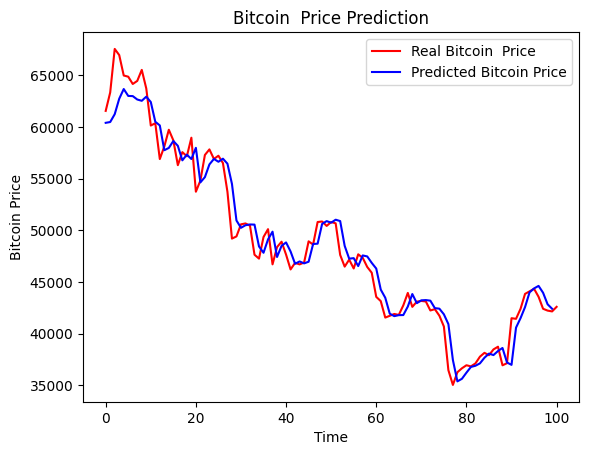

In [13]:
#Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Bitcoin  Price')
plt.plot(predicted_crypto_price, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin  Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()